In [10]:
import matplotlib as mpl
mpl.rc('figure', dpi = 300, figsize = (10, 15))

import matplotlib.pyplot as plt

In [11]:
from skimage import img_as_bool, img_as_float
from skimage.io import imread, imshow
from skimage.filters import sobel_h
from skimage.feature import canny
from skimage.color import gray2rgb
from skimage.morphology import closing, opening

In [12]:
def pretty_print(img):
    for row in img:
        print('[ ', end = '')
        for col in row:
            print("{:.2f}".format(col), end = ' ')
        print(']')

In [18]:
from numpy import zeros, ndarray


def _gradient_vertical_(img: ndarray):
    horizontal = zeros(img.shape)

    for i, row in enumerate(img):
        for col in range(1, len(row)):
            dz = abs(row[col] - row[col - 1])
            horizontal[i, col] = dz

    return horizontal


def _gradient_horizontal_(img: ndarray):
    vertical = zeros(img.shape)

    for row in range(1, len(img)):
        for col in range(len(img[row])):
            dz = abs(img[row, col] - img[row - 1, col])
            vertical[row, col] = dz

    return vertical


def gradient(img: ndarray, direction='both'):
    '''
    direction indicates which gradient should be computed:
        - `horizontal` for gradient from top to bottom
        - `vertical` for gradient from left to right
        - `both` vertical and horizontal combined into one.
    '''
    if direction == 'horizontal':
        return _gradient_horizontal_(img)
    elif direction == 'vertical':
        return _gradient_vertical_(img)
    elif direction == 'both':
        grad = zeros(img.shape)

        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                if row > 0:
                    grad[row, col] += img[row, col] - img[row - 1, col]
                if col > 0:
                    grad[row, col] += img[row, col] - img[row, col - 1]

        return grad

In [19]:
def find_horizontal_lines(img) -> list[int]:
    thresh = img.shape[1] / 2
    return [index for index, row in enumerate(img) if sum(row) < thresh]

In [20]:
# import score

In [21]:
# score.binarize('res/test_00.png')
# score.detect_lines('res/test_00.png')

C:\Users\Jakub\AppData\Local\Temp/ipykernel_14576/263307437.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
  dz = abs(img[row, col] - img[row - 1, col])


(0.0, 255.0, 0.0, 255.0)

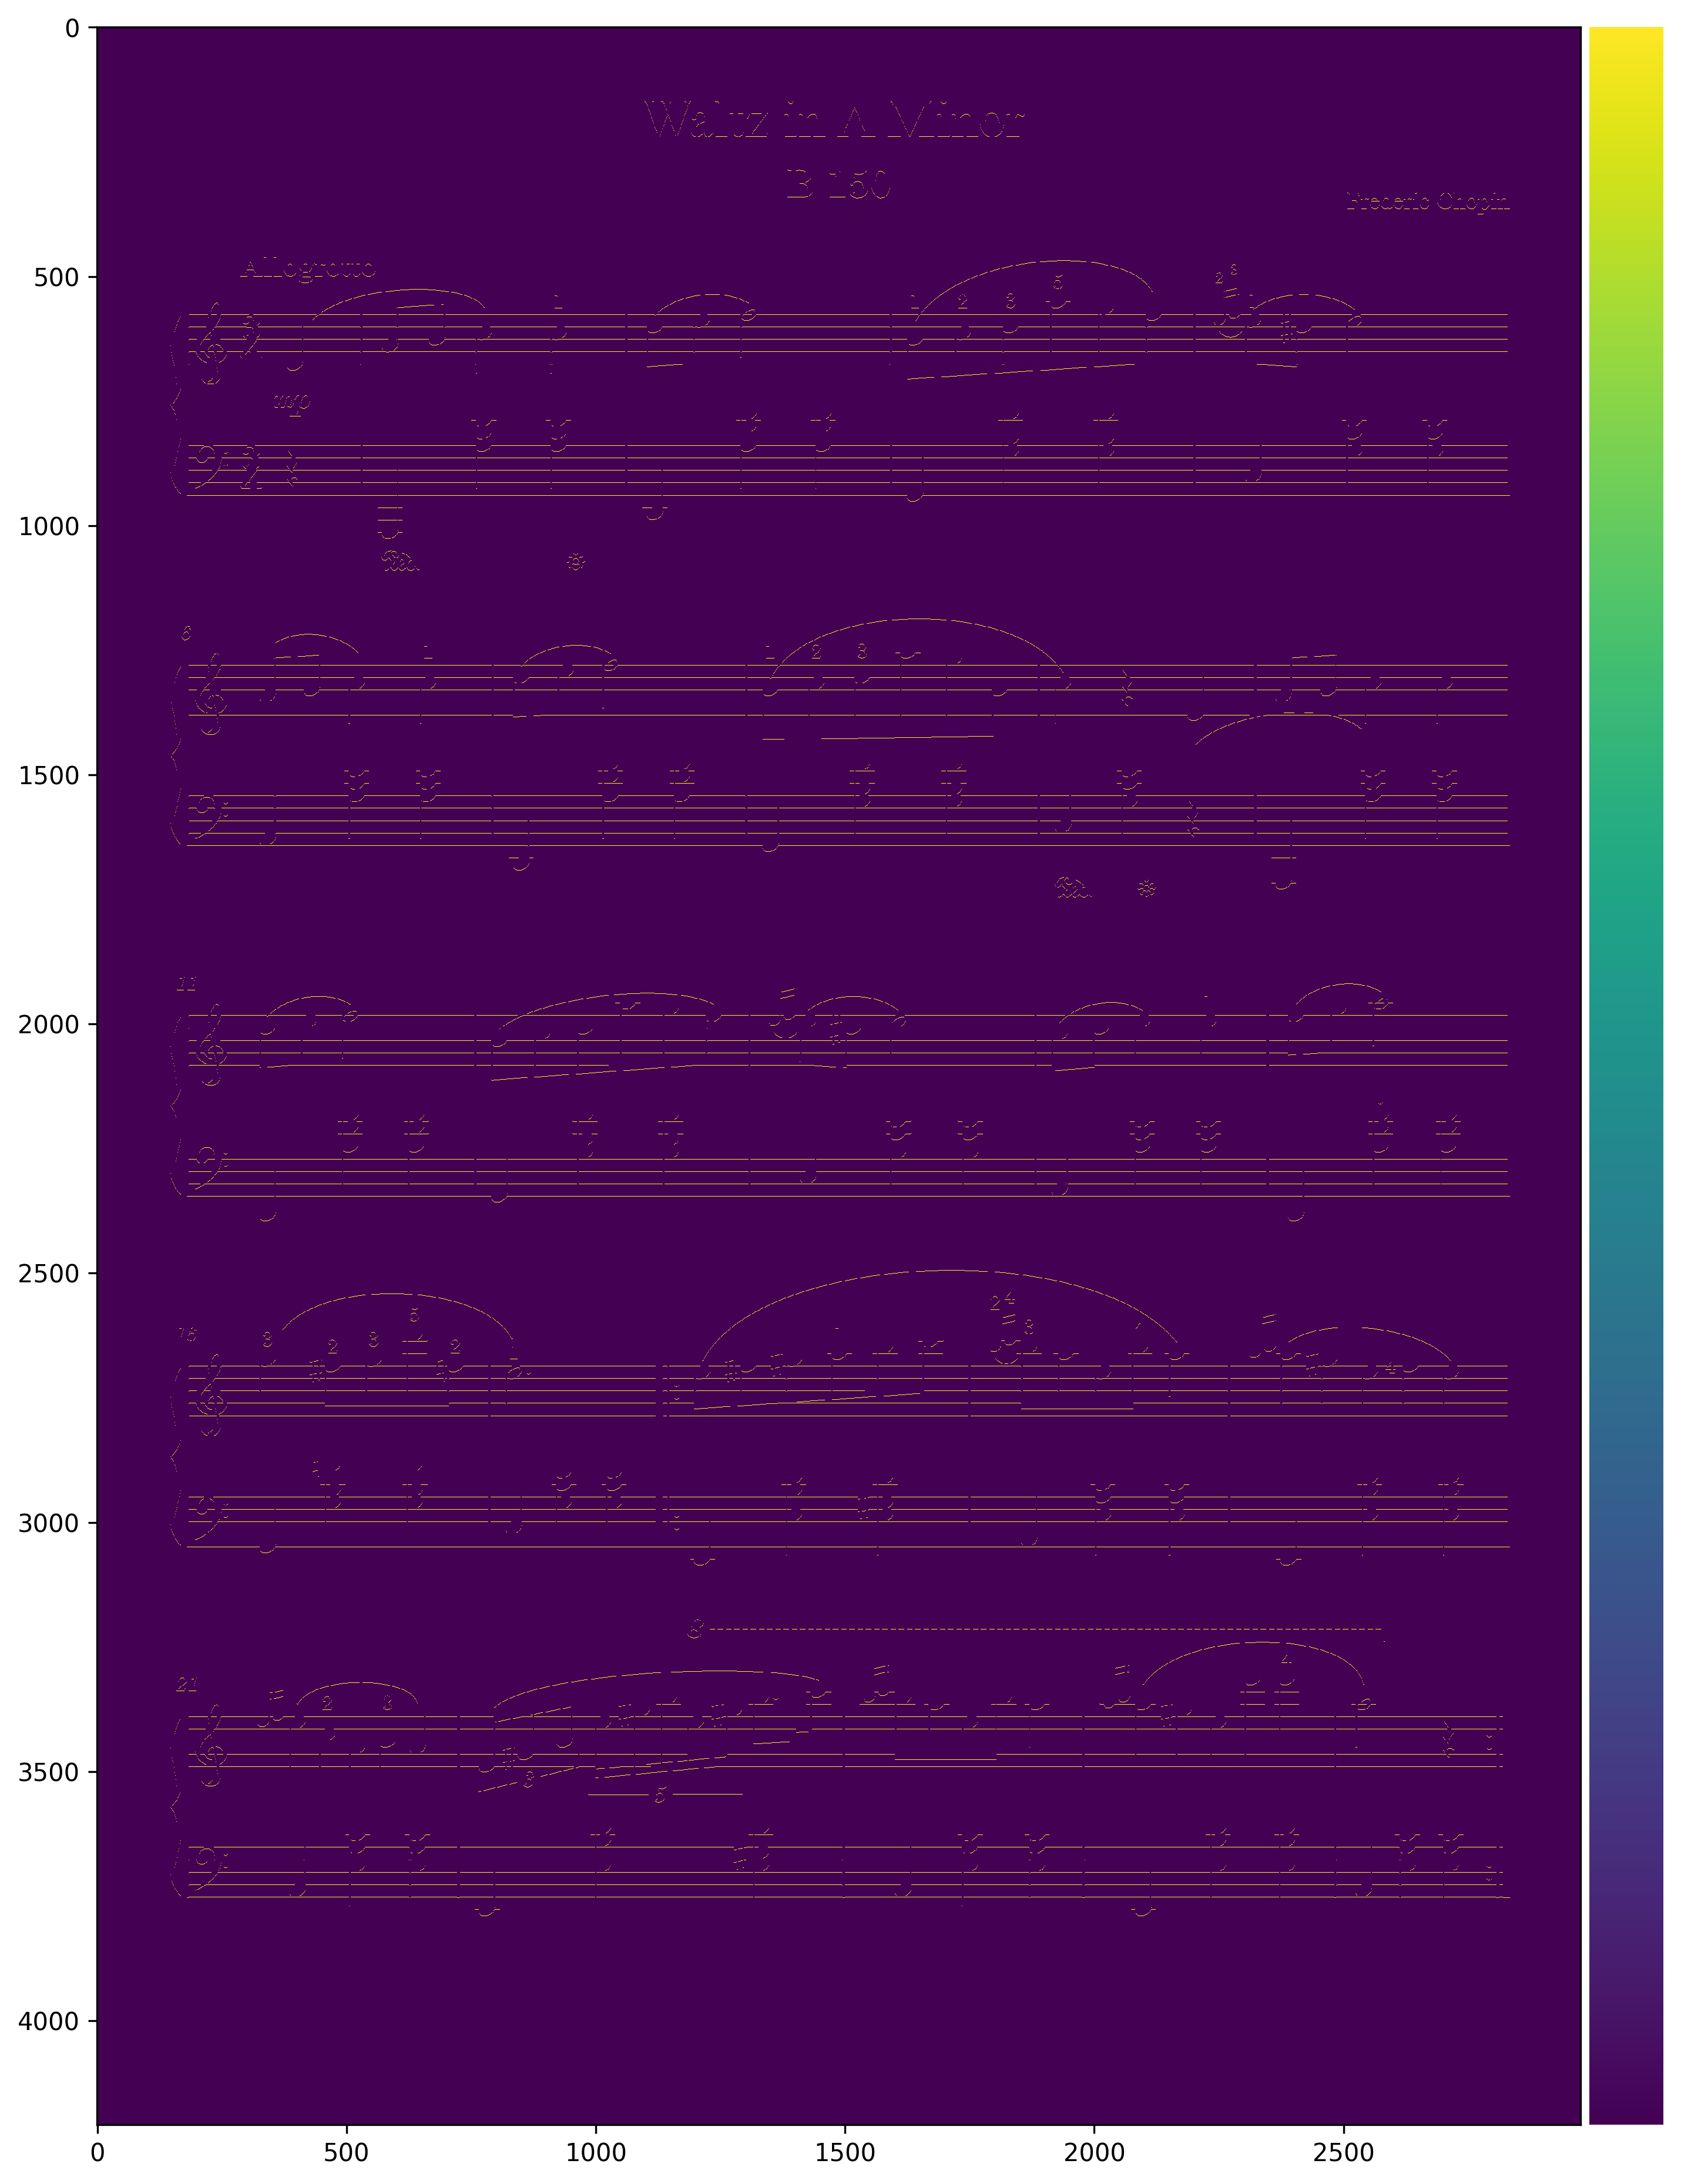

In [22]:
src = imread('processed/binary_00.png', as_gray = True)
img = gradient(src, direction = 'horizontal')
# src = gray2rgb(src)

# for row in img:
#     src[row, :] = [255, 0, 0]

imshow(img)
plt.axis('off')